# Table of Contents
- Imports Necessary Libraries

- Data Exploration
    - Exploring Dataset

- Data Cleaning & Outlier Detection
    - Missing values
    - Duplicated values
    - Removing & clipping outliers
  
- Feature Encoding & PCA
    - Encoding the categorical features
    - Principal Components Analysis: reducing dimenstions into 2D

- Model Training & Evaluation
    - KMeans Clustering
    - Hyper-parameter tuning
    - Select best parameter

- Model Pipeline
    - Save model
    - Load model
    - Test with user's data

# Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle

# Data Exploration

In [2]:
df = pd.read_csv('spotify_dataset.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
print(df.shape)

df.dtypes

(232725, 18)


genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [4]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


# Data Cleaning

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isna().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Check distribution

In [7]:
numeric_df = df.select_dtypes('number')
numeric_columns = numeric_df.columns

In [8]:
def hist(col):
    sns.histplot(df, x=col)
    plt.show()

Boxplot

In [9]:
def box(col):
    sns.boxplot(df[col])
    plt.show()

In [10]:
categorical_df = df.select_dtypes(include='O')
categorical_columns = categorical_df.columns

categorical_columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'key', 'mode',
       'time_signature'],
      dtype='object')

In [11]:
for col in categorical_columns:
    print(col)
    print(f'Number of unique class : {df[col].nunique()}\n')

genre
Number of unique class : 27

artist_name
Number of unique class : 14564

track_name
Number of unique class : 148614

track_id
Number of unique class : 176774

key
Number of unique class : 12

mode
Number of unique class : 2

time_signature
Number of unique class : 5



In [12]:
# remove unnecessary columns including target
df.drop(columns=['genre', 'instrumentalness', 'artist_name', 'track_name', 'track_id'], inplace=True)

In [13]:
df.duplicated().sum()

np.int64(41766)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
print('Class distribution of Categorical Columns\n')

for col in ['key', 'mode', 'time_signature']:
    print(df[col].value_counts())
    print('\n')

Class distribution of Categorical Columns

key
C     22670
G     22078
D     20119
A     18888
C#    18267
F     16749
E     14487
B     14132
A#    12732
F#    12366
G#    12083
D#     6388
Name: count, dtype: int64


mode
Major    125708
Minor     65251
Name: count, dtype: int64


time_signature
4/4    162120
3/4     21828
5/4      4591
1/4      2413
0/4         7
Name: count, dtype: int64




# Outlier Detection

In [16]:
def detect_outliers(col):

  # to define upper and lower outlier bound
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1 
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  outliers = (df[col] < lower_bound) | (df[col] > upper_bound) 
  outliers_index = df[col][outliers].index

  print(f"{col} variable\n"
        f"Outliers boundaries: {lower_bound}, {upper_bound}\n"
        f"Number of outliers : {len(outliers_index)}")

  return col, lower_bound, upper_bound, outliers_index

In [17]:
numeric_df = df.select_dtypes('number')
numeric_columns = numeric_df.columns

for col in numeric_columns:
    detect_outliers(col)
    print('\n')

popularity variable
Outliers boundaries: -10.0, 86.0
Number of outliers : 149




acousticness variable
Outliers boundaries: -1.0594999999999999, 1.8709
Number of outliers : 0


danceability variable
Outliers boundaries: 0.02349999999999991, 1.0755000000000001
Number of outliers : 0


duration_ms variable
Outliers boundaries: 48033.25, 399771.25
Number of outliers : 11659


energy variable
Outliers boundaries: -0.29500000000000015, 1.4490000000000003
Number of outliers : 0


liveness variable
Outliers boundaries: -0.16750000000000004, 0.5389
Number of outliers : 18560


loudness variable
Outliers boundaries: -22.974, 4.906
Number of outliers : 10063


speechiness variable
Outliers boundaries: -0.05794999999999998, 0.19444999999999998
Number of outliers : 27679


tempo variable
Outliers boundaries: 21.90950000000001, 209.2655
Number of outliers : 109


valence variable
Outliers boundaries: -0.43000000000000005, 1.322
Number of outliers : 0




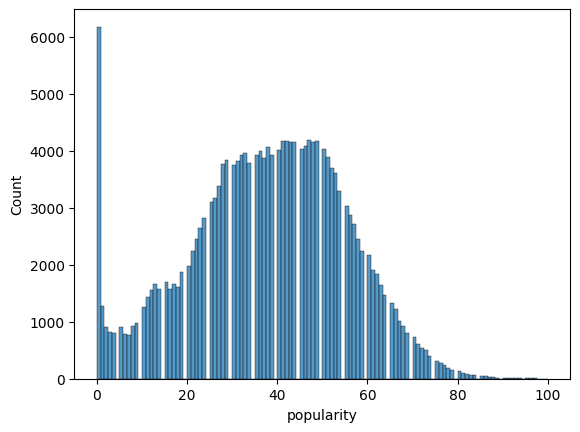

In [18]:
hist('popularity')

In [19]:
df['popularity'].unique()

array([  0,   1,   3,   4,   2,  15,  10,   8,   5,   6,   7,  11,  65,
        63,  62,  61,  68,  64,  66,  60,  69,  71,  76,  67,  70,  72,
        57,  59,  56,  28,  31,  74,  55,  53,   9,  13,  23,  12,  44,
        33,  25,  26,  24,  22,  20,  19,  18,  16,  17,  14,  83,  81,
        73,  78,  77,  75,  45,  42,  46,  54,  41,  52,  58,  51,  43,
        47,  48,  40,  50,  49,  39,  80,  37,  35,  21,  38,  36,  29,
        34,  32,  99, 100,  97,  92,  91,  95,  90,  93,  88,  87,  89,
        96,  86,  85,  84,  94,  82,  79,  27,  30,  98])

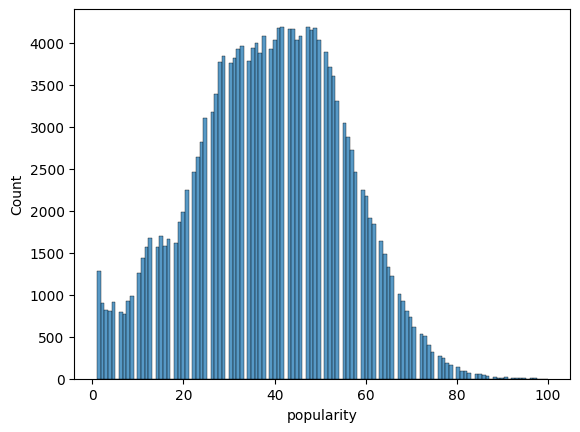

In [20]:
df = df[df['popularity']>0]
hist('popularity')

In [21]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('popularity')

popularity variable
Outliers boundaries: -6.5, 85.5
Number of outliers : 193


In [22]:
df['popularity'] = df['popularity'].clip(lower=lower_bound, upper=upper_bound )

In [23]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('popularity')

popularity variable
Outliers boundaries: -6.5, 85.5
Number of outliers : 0


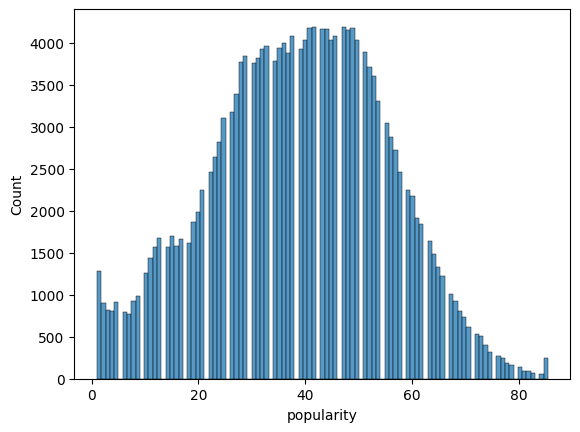

In [24]:
hist('popularity')

acousticness

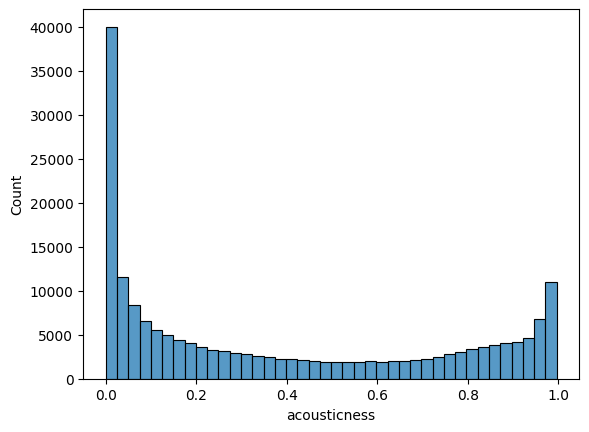

acousticness variable
Outliers boundaries: -1.0437500000000002, 1.83745
Number of outliers : 0


In [25]:
hist('acousticness')

col, lower_bound, upper_bound, outliers_index = detect_outliers('acousticness')

tempo

tempo variable
Outliers boundaries: 21.384, 210.11
Number of outliers : 77


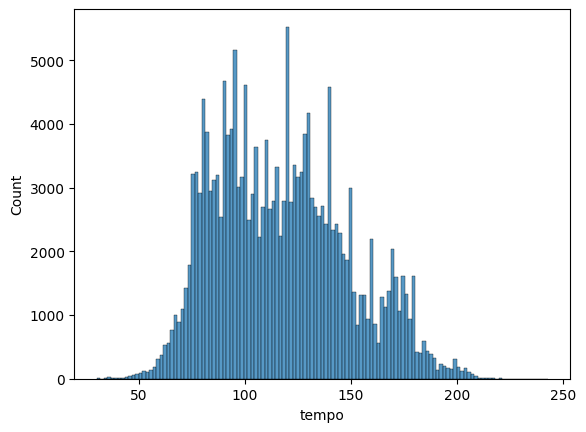

In [26]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('tempo')

hist('tempo')

In [27]:
df['tempo'] = df['tempo'].clip(lower=lower_bound, upper=upper_bound)

tempo variable
Outliers boundaries: 21.384, 210.11
Number of outliers : 0


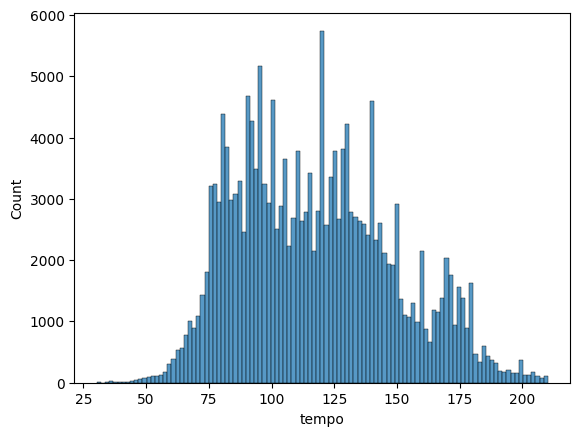

In [28]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('tempo')

hist('tempo')

energy

energy variable
Outliers boundaries: -0.26850000000000007, 1.4395000000000002
Number of outliers : 0


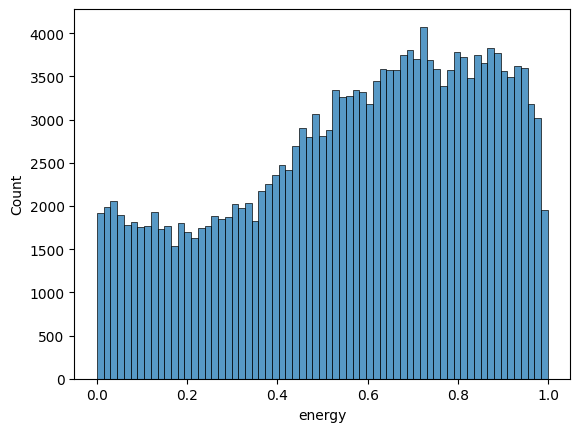

In [29]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('energy')

hist('energy')

Loudness

loudness variable
Outliers boundaries: -22.423499999999997, 4.6685
Number of outliers : 10346


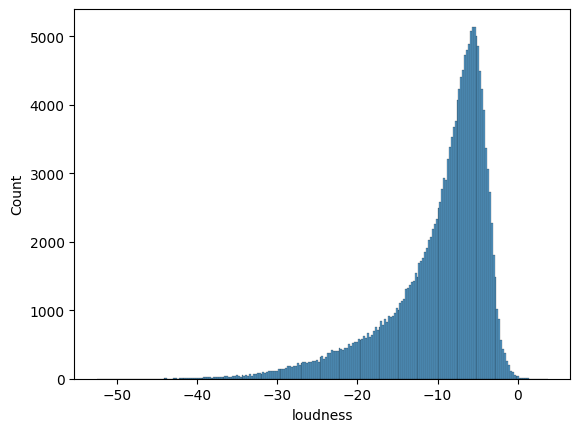

In [30]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('loudness')

hist('loudness')

In [31]:
df.drop(index=(outliers_index), inplace=True)

In [32]:
df.shape

(174432, 13)

loudness variable
Outliers boundaries: -20.035000000000004, 3.421000000000001
Number of outliers : 4748


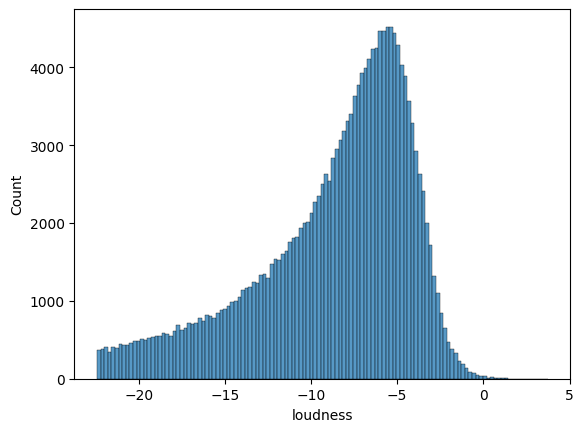

In [33]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('loudness')

hist('loudness')

loudness variable
Outliers boundaries: -20.035000000000004, 3.421000000000001
Number of outliers : 4748


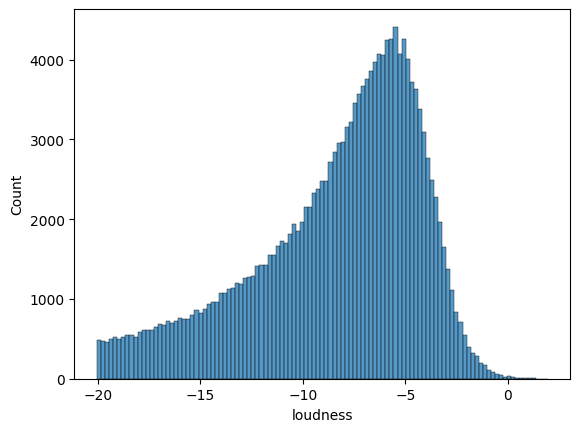

In [34]:
# drop the outliers
col, lower_bound, upper_bound, outliers_index = detect_outliers('loudness')

df.drop(index=(outliers_index), inplace=True)

hist('loudness')

In [35]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('loudness')

loudness variable
Outliers boundaries: -19.0855, 2.942500000000001
Number of outliers : 2338


In [36]:
df.drop(index=(outliers_index), inplace=True)

loudness variable
Outliers boundaries: -18.627, 2.7089999999999996
Number of outliers : 1200


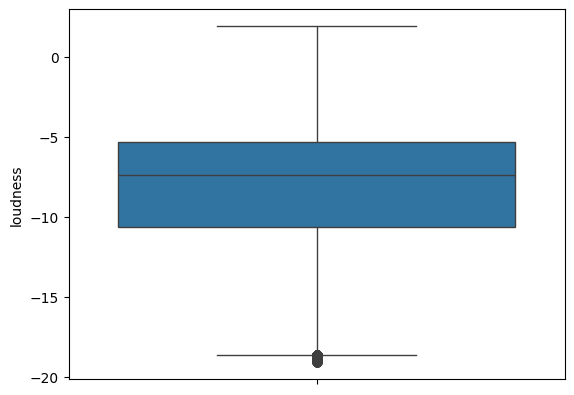

In [37]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('loudness')

box('loudness')

loudness variable
Outliers boundaries: -18.406000000000002, 2.602000000000001
Number of outliers : 600


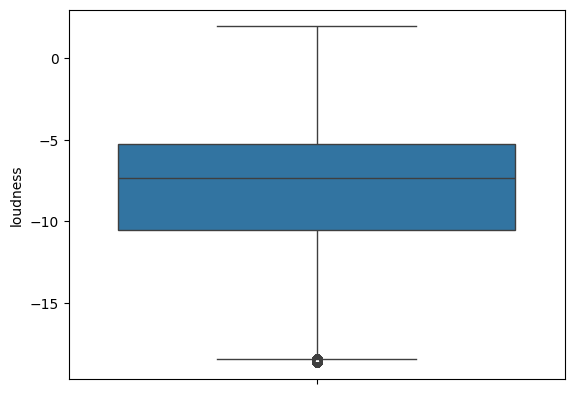

In [38]:
df.drop(index=(outliers_index), inplace=True)

col, lower_bound, upper_bound, outliers_index = detect_outliers('loudness')

box('loudness')

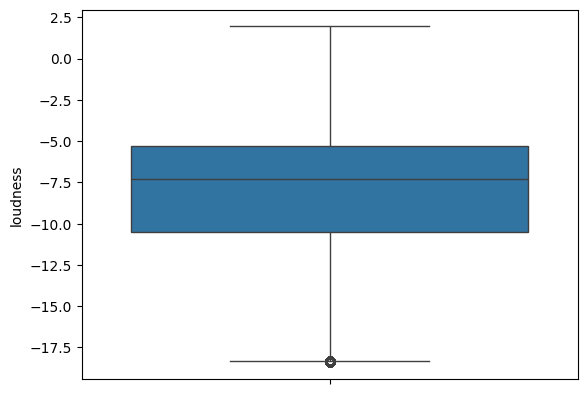

In [39]:
df.drop(index=(outliers_index), inplace=True)

box('loudness')

In [40]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('loudness')

loudness variable
Outliers boundaries: -18.2975, 2.546500000000001
Number of outliers : 286


Liveness

In [41]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('liveness')

liveness variable
Outliers boundaries: -0.18174999999999997, 0.5650499999999999
Number of outliers : 15874


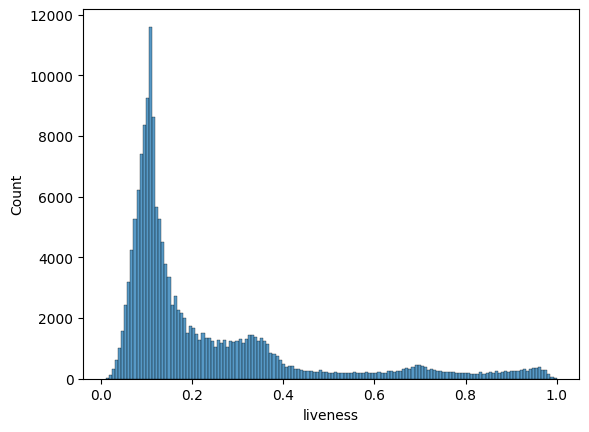

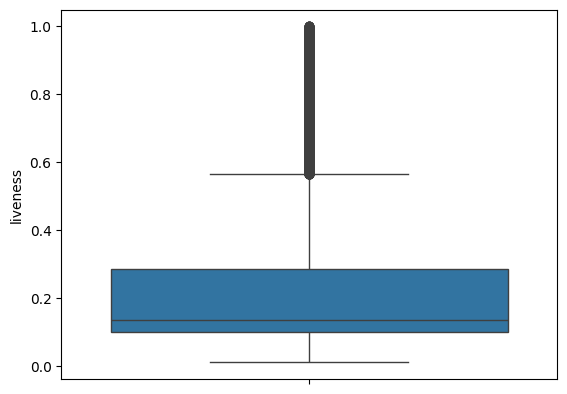

In [42]:
hist('liveness')
box('liveness')

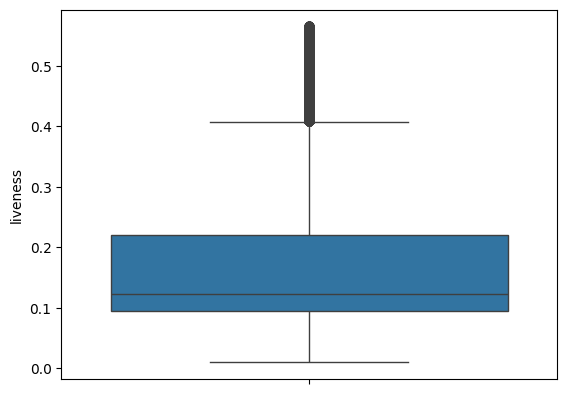

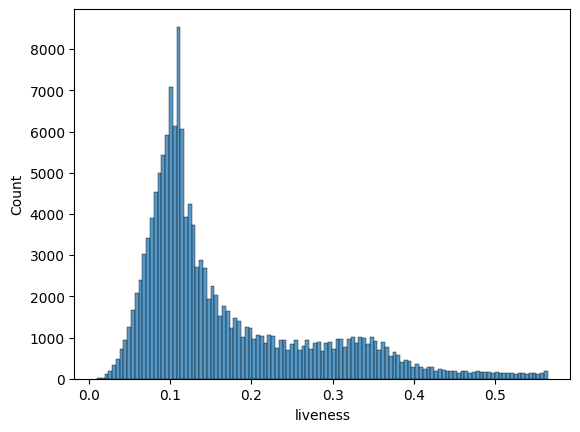

In [43]:
df.drop(index=(outliers_index), inplace=True)

box('liveness')
hist('liveness')

liveness variable
Outliers boundaries: -0.09199999999999997, 0.4072
Number of outliers : 5824


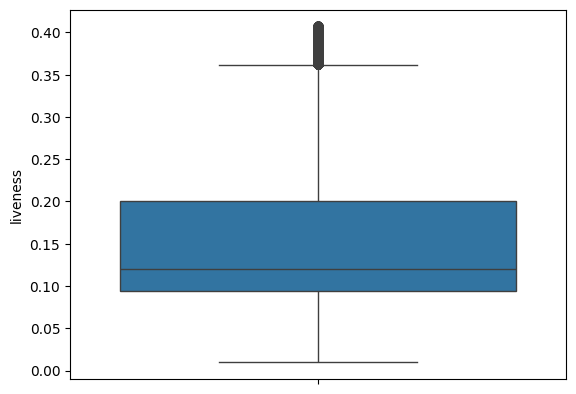

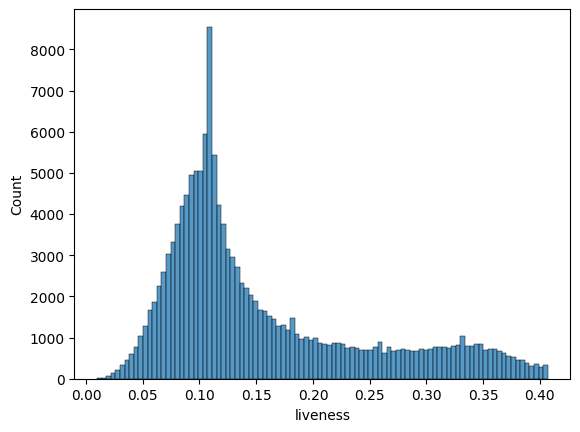

In [44]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('liveness')
df.drop(index=(outliers_index), inplace=True)

box('liveness')
hist('liveness')

In [45]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('liveness')
df.drop(index=(outliers_index), inplace=True)

liveness variable
Outliers boundaries: -0.06650000000000003, 0.36150000000000004
Number of outliers : 5125


In [46]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('liveness')
df.drop(index=(outliers_index), inplace=True)

liveness variable
Outliers boundaries: -0.04500000000000001, 0.323
Number of outliers : 7513


In [47]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('liveness')
df.drop(index=(outliers_index), inplace=True)

liveness variable
Outliers boundaries: -0.022000000000000033, 0.28040000000000004
Number of outliers : 7905


In [48]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('liveness')
df.drop(index=(outliers_index), inplace=True)

liveness variable
Outliers boundaries: -0.0037499999999999895, 0.24545
Number of outliers : 6183


In [49]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('liveness')
df.drop(index=(outliers_index), inplace=True)

liveness variable
Outliers boundaries: 0.007750000000000021, 0.22254999999999997
Number of outliers : 4404


In [50]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('liveness')
df.drop(index=(outliers_index), inplace=True)

liveness variable
Outliers boundaries: 0.012749999999999997, 0.21155000000000002
Number of outliers : 2352


In [51]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('liveness')
df.drop(index=(outliers_index), inplace=True)

liveness variable
Outliers boundaries: 0.016, 0.2048
Number of outliers : 1533


liveness variable
Outliers boundaries: 0.018000000000000002, 0.20040000000000002
Number of outliers : 1000


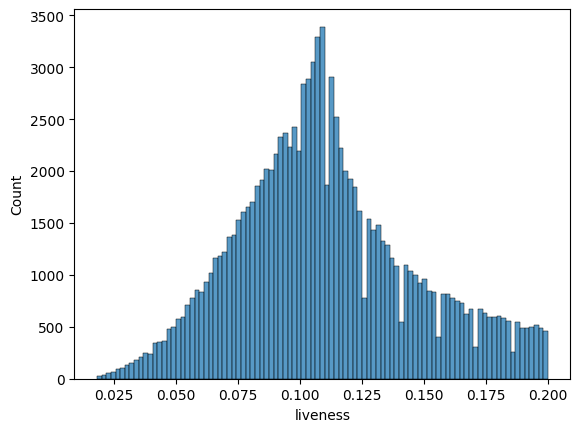

In [52]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('liveness')
df.drop(index=(outliers_index), inplace=True)

hist('liveness')

In [53]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('liveness')
df.drop(index=(outliers_index), inplace=True)

liveness variable
Outliers boundaries: 0.01899999999999999, 0.19820000000000002
Number of outliers : 467


In [54]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('liveness')

liveness variable
Outliers boundaries: 0.018749999999999975, 0.19835000000000003
Number of outliers : 0


Speechness

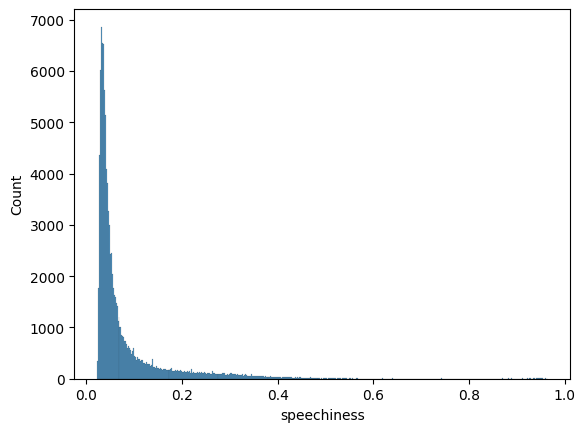

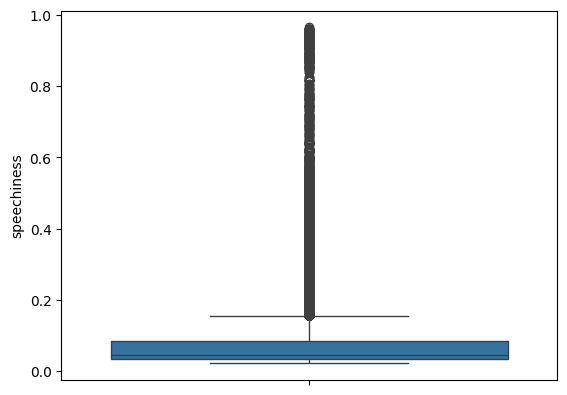

In [55]:
hist('speechiness')
box('speechiness')

In [56]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('speechiness')

speechiness variable
Outliers boundaries: -0.0385, 0.1567
Number of outliers : 13794


In [57]:
df.drop(index=(outliers_index), inplace=True)

speechiness variable
Outliers boundaries: -0.0092, 0.1052
Number of outliers : 7260


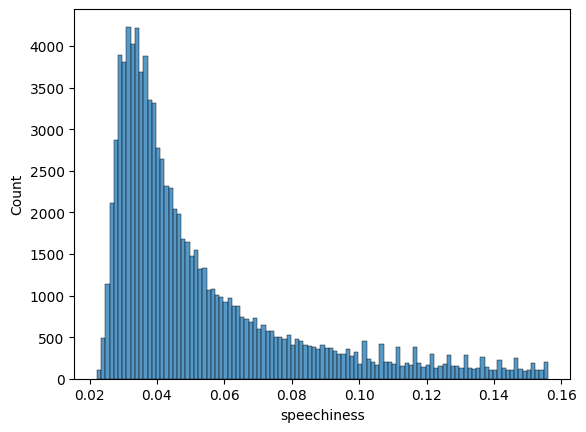

In [58]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('speechiness')

hist('speechiness')

df.drop(index=(outliers_index), inplace=True)

speechiness variable
Outliers boundaries: -0.0003500000000000031, 0.08885
Number of outliers : 4127


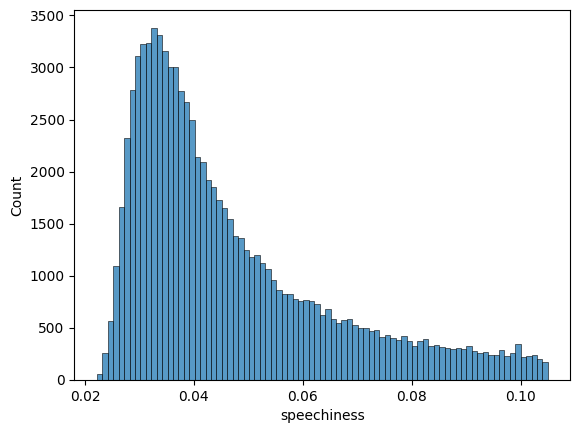

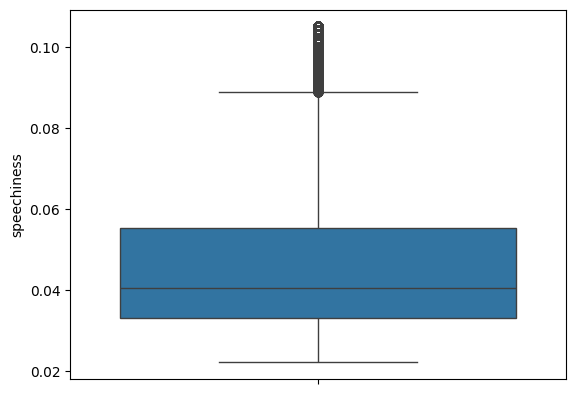

In [59]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('speechiness')

hist('speechiness')
box('speechiness')

In [60]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('speechiness')

df.drop(index=(outliers_index), inplace=True)

speechiness variable
Outliers boundaries: -0.0003500000000000031, 0.08885
Number of outliers : 4127


In [61]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('speechiness')

df.drop(index=(outliers_index), inplace=True)

speechiness variable
Outliers boundaries: 0.0034000000000000037, 0.0818
Number of outliers : 2268


In [62]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('speechiness')

df.drop(index=(outliers_index), inplace=True)

speechiness variable
Outliers boundaries: 0.005149999999999991, 0.07835
Number of outliers : 1303


In [63]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('speechiness')

df.drop(index=(outliers_index), inplace=True)

speechiness variable
Outliers boundaries: 0.006100000000000005, 0.0765
Number of outliers : 674


In [64]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('speechiness')

df.drop(index=(outliers_index), inplace=True)

speechiness variable
Outliers boundaries: 0.006700000000000001, 0.0755
Number of outliers : 428


speechiness variable
Outliers boundaries: 0.006999999999999999, 0.07500000000000001
Number of outliers : 229


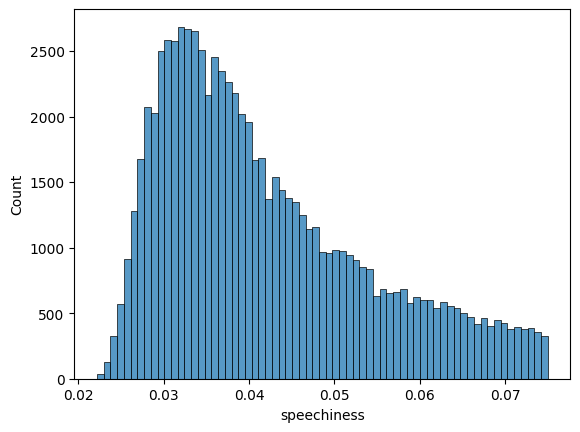

In [65]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('speechiness')

df.drop(index=(outliers_index), inplace=True)

hist('speechiness')

In [66]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('speechiness')

df.drop(index=(outliers_index), inplace=True)

speechiness variable
Outliers boundaries: 0.007050000000000001, 0.07465
Number of outliers : 146


In [67]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('speechiness')

df.drop(index=(outliers_index), inplace=True)

speechiness variable
Outliers boundaries: 0.007199999999999995, 0.07440000000000001
Number of outliers : 96


speechiness variable
Outliers boundaries: 0.007199999999999995, 0.07440000000000001
Number of outliers : 0


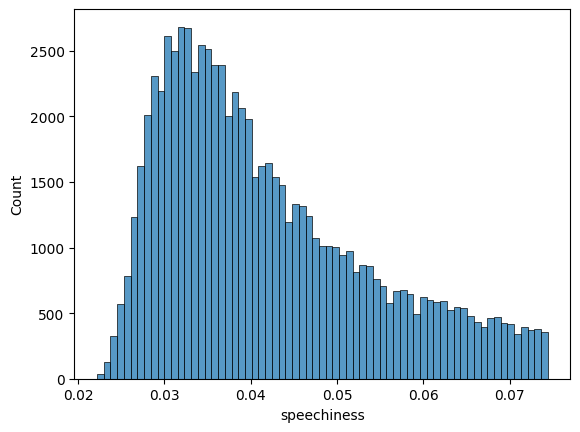

In [68]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('speechiness')

hist('speechiness')

Danceability

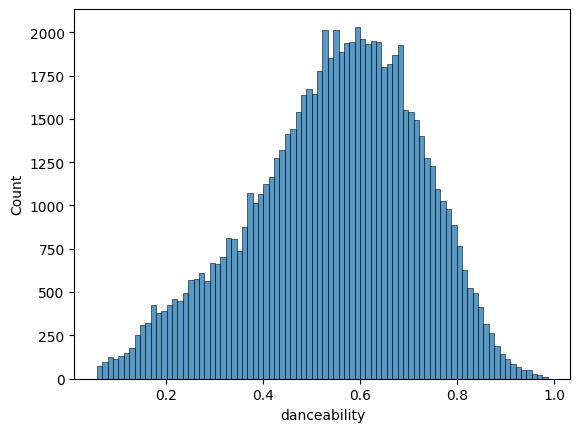

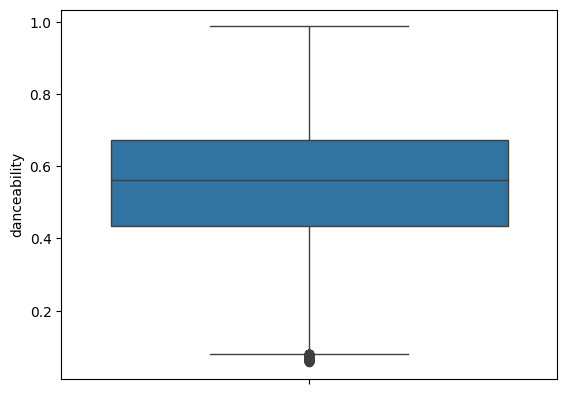

In [69]:
hist('danceability')
box('danceability')

In [70]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('danceability')

danceability variable
Outliers boundaries: 0.07949999999999996, 1.0275
Number of outliers : 175


In [71]:
df.drop(index=(outliers_index), inplace=True)

In [72]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('danceability')

df.drop(index=(outliers_index), inplace=True)

danceability variable
Outliers boundaries: 0.08049999999999996, 1.0285000000000002
Number of outliers : 9


In [73]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('danceability')

danceability variable
Outliers boundaries: 0.08049999999999996, 1.0285000000000002
Number of outliers : 0


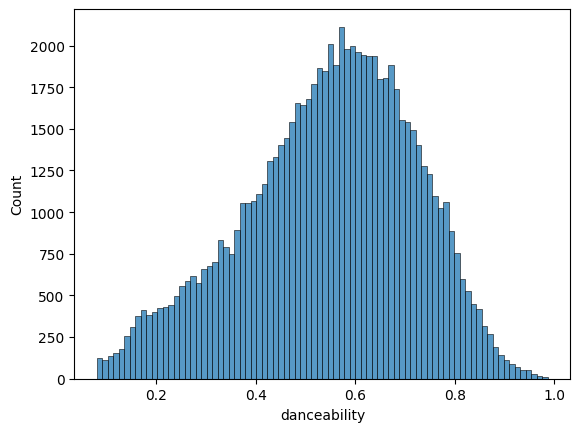

In [74]:
df['danceability'] = df['danceability'].clip(lower_bound, upper_bound)

hist('danceability')

In [75]:
df.shape

(76857, 13)

duration_ms

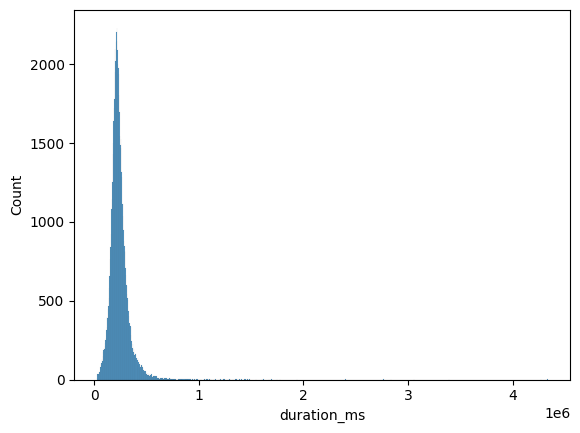

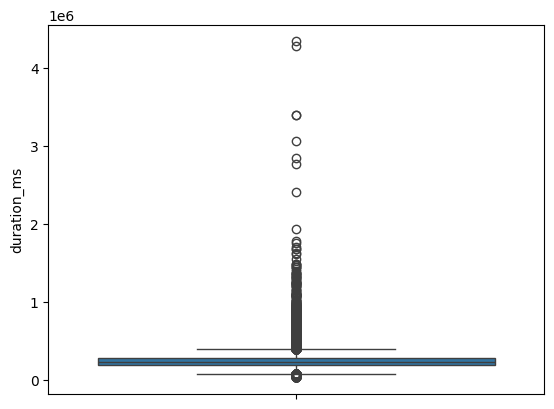

In [76]:
hist('duration_ms')
box('duration_ms')

In [77]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('duration_ms')

df.drop(index = (outliers_index), inplace=True)

duration_ms variable
Outliers boundaries: 68538.0, 394890.0
Number of outliers : 4194


duration_ms variable
Outliers boundaries: 77781.25, 376435.25
Number of outliers : 1111


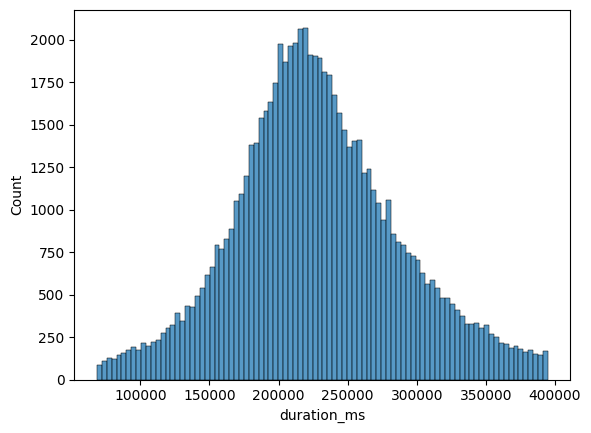

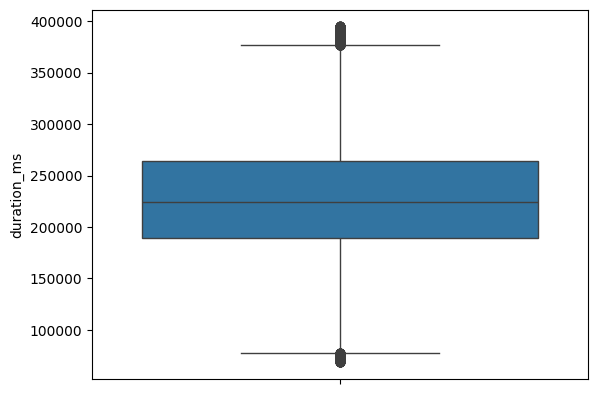

In [78]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('duration_ms')
hist('duration_ms')
box('duration_ms')

In [79]:
df['duration_ms'] = df['duration_ms'].clip(lower=lower_bound, upper=upper_bound)

In [80]:
df.drop(index = (outliers_index), inplace=True)

duration_ms variable
Outliers boundaries: 80259.625, 372260.625
Number of outliers : 278


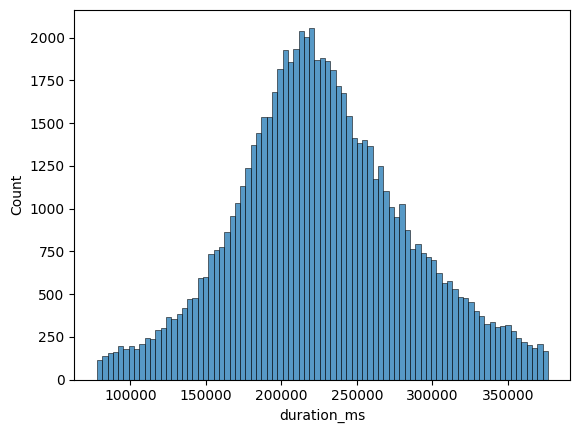

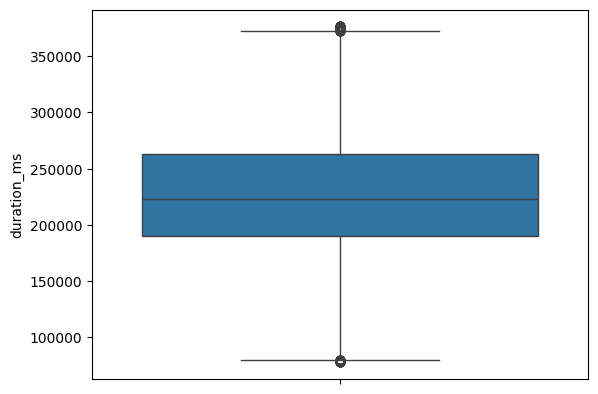

In [81]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('duration_ms')
hist('duration_ms')
box('duration_ms')

In [82]:
df.drop(index = (outliers_index), inplace=True)

col, lower_bound, upper_bound, outliers_index = detect_outliers('duration_ms')

duration_ms variable
Outliers boundaries: 80966.375, 371189.375
Number of outliers : 87


In [83]:
df.drop(index = (outliers_index), inplace=True)

col, lower_bound, upper_bound, outliers_index = detect_outliers('duration_ms')

duration_ms variable
Outliers boundaries: 81099.5, 370967.5
Number of outliers : 17


duration_ms variable
Outliers boundaries: 81114.875, 370941.875
Number of outliers : 3


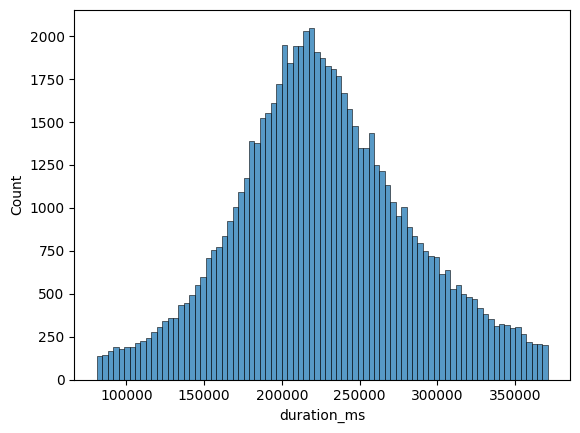

In [84]:
df.drop(index = (outliers_index), inplace=True)

col, lower_bound, upper_bound, outliers_index = detect_outliers('duration_ms')

hist('duration_ms')

In [85]:
df.drop(index = (outliers_index), inplace=True)

In [86]:
col, lower_bound, upper_bound, outliers_index = detect_outliers('duration_ms')

duration_ms variable
Outliers boundaries: 81130.25, 370916.25
Number of outliers : 1


In [87]:
for col in numeric_columns:
    detect_outliers(col)
    print('\n')

popularity variable
Outliers boundaries: -0.5, 83.5
Number of outliers : 126


acousticness variable
Outliers boundaries: -0.8935, 1.5857
Number of outliers : 0


danceability variable
Outliers boundaries: 0.10599999999999993, 1.0180000000000002
Number of outliers : 232


duration_ms variable
Outliers boundaries: 81130.25, 370916.25
Number of outliers : 1


energy variable
Outliers boundaries: -0.16949999999999998, 1.3065
Number of outliers : 0


liveness variable
Outliers boundaries: 0.023500000000000007, 0.19390000000000002
Number of outliers : 894


loudness variable
Outliers boundaries: -19.290750000000003, 2.507250000000001
Number of outliers : 0


speechiness variable
Outliers boundaries: 0.006800000000000011, 0.07479999999999999
Number of outliers : 0


tempo variable
Outliers boundaries: 31.90924999999997, 201.26725000000005
Number of outliers : 212


valence variable
Outliers boundaries: -0.41300000000000003, 1.323
Number of outliers : 0




In [88]:
df.shape

(71167, 13)

In [89]:
numerical_features = ['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

categorical_features = [
 'key',
 'mode',
 'time_signature']

final_cols = numerical_features + categorical_features

final_df = df[final_cols]
final_df

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature
2,3.0,0.95200,0.663,170267.0,0.131,0.1030,-13.879,0.0362,99.488,0.368,C,Minor,5/4
7,15.0,0.93900,0.416,240067.0,0.269,0.1130,-8.949,0.0286,96.827,0.274,F#,Major,4/4
12,4.0,0.21500,0.680,213589.0,0.600,0.1110,-7.702,0.0258,110.026,0.433,F#,Minor,4/4
13,3.0,0.95800,0.758,308627.0,0.264,0.0543,-11.966,0.0496,110.068,0.742,D#,Major,3/4
18,1.0,0.38100,0.451,194360.0,0.491,0.1520,-8.730,0.0548,71.633,0.516,D,Major,3/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232711,41.0,0.00166,0.764,242013.0,0.757,0.1020,-7.049,0.0494,115.016,0.669,A#,Minor,4/4
232712,38.0,0.03810,0.630,230937.0,0.655,0.1680,-6.708,0.0366,102.009,0.329,C,Minor,4/4
232714,39.0,0.11300,0.611,279510.0,0.493,0.1050,-9.297,0.0354,115.920,0.443,C#,Major,4/4
232718,43.0,0.01360,0.294,258267.0,0.739,0.1380,-7.167,0.0434,176.402,0.945,C,Major,4/4


အပေါ်က code ကို မထိနဲ့တော့ 

# Encoding

In [90]:
for col in ['mode','key', 'time_signature']:
    print(final_df[col].value_counts())
    print('\n')

mode
Major    48456
Minor    22711
Name: count, dtype: int64


key
C     9106
G     8375
D     7620
A     7275
F     6252
C#    6004
E     5353
B     5198
G#    4529
A#    4494
F#    4448
D#    2513
Name: count, dtype: int64


time_signature
4/4    63100
3/4     6650
5/4      910
1/4      506
0/4        1
Name: count, dtype: int64




In [91]:
df = df[df['time_signature']!='0/4']

df['time_signature'].value_counts()

time_signature
4/4    63100
3/4     6650
5/4      910
1/4      506
Name: count, dtype: int64

In [92]:
# map the 'mode' column
df['mode'] = df['mode'].map({'Major':1, 'Minor':0})

In [93]:
# one hot encoding --> key
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

ohe.fit(df[['key']])

key_encoded = ohe.transform(df[['key']])

key_encoded_df = pd.DataFrame(key_encoded, columns=ohe.get_feature_names_out(['key']), index=df.index)


In [94]:
ohe.fit(df[['time_signature']])

time_encoded = ohe.transform(df[['time_signature']])
time_encoded_df = pd.DataFrame(time_encoded, columns=ohe.get_feature_names_out(['time_signature']), index=df.index)

In [95]:
type(df)

pandas.core.frame.DataFrame

In [96]:
numerical_features

['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [97]:
numerical_df = df[numerical_features] 
type(numeric_df)

pandas.core.frame.DataFrame

In [98]:
final_df = pd.concat([numerical_df, key_encoded_df, time_encoded_df], axis=1)

In [99]:
type(final_df)

final_df

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,...,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
2,3.0,0.95200,0.663,170267.0,0.131,0.1030,-13.879,0.0362,99.488,0.368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,15.0,0.93900,0.416,240067.0,0.269,0.1130,-8.949,0.0286,96.827,0.274,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12,4.0,0.21500,0.680,213589.0,0.600,0.1110,-7.702,0.0258,110.026,0.433,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
13,3.0,0.95800,0.758,308627.0,0.264,0.0543,-11.966,0.0496,110.068,0.742,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18,1.0,0.38100,0.451,194360.0,0.491,0.1520,-8.730,0.0548,71.633,0.516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232711,41.0,0.00166,0.764,242013.0,0.757,0.1020,-7.049,0.0494,115.016,0.669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
232712,38.0,0.03810,0.630,230937.0,0.655,0.1680,-6.708,0.0366,102.009,0.329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
232714,39.0,0.11300,0.611,279510.0,0.493,0.1050,-9.297,0.0354,115.920,0.443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
232718,43.0,0.01360,0.294,258267.0,0.739,0.1380,-7.167,0.0434,176.402,0.945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [100]:
final_df.reset_index(inplace=True)


In [101]:
final_df.drop(columns=['index'], inplace=True)

final_df

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,...,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,3.0,0.95200,0.663,170267.0,0.131,0.1030,-13.879,0.0362,99.488,0.368,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,15.0,0.93900,0.416,240067.0,0.269,0.1130,-8.949,0.0286,96.827,0.274,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.0,0.21500,0.680,213589.0,0.600,0.1110,-7.702,0.0258,110.026,0.433,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,0.95800,0.758,308627.0,0.264,0.0543,-11.966,0.0496,110.068,0.742,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.38100,0.451,194360.0,0.491,0.1520,-8.730,0.0548,71.633,0.516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71161,41.0,0.00166,0.764,242013.0,0.757,0.1020,-7.049,0.0494,115.016,0.669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71162,38.0,0.03810,0.630,230937.0,0.655,0.1680,-6.708,0.0366,102.009,0.329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71163,39.0,0.11300,0.611,279510.0,0.493,0.1050,-9.297,0.0354,115.920,0.443,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71164,43.0,0.01360,0.294,258267.0,0.739,0.1380,-7.167,0.0434,176.402,0.945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Scaling

In [102]:
numeric_columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence'],
      dtype='object')

In [103]:
scaler = StandardScaler()

scaled_df = final_df.copy()

scaled_df[numeric_columns] = scaler.fit_transform(scaled_df[numeric_columns])

scaled_df

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,...,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,-2.462811,1.783611,0.650908,-0.997097,-1.863727,-0.215683,-1.374916,-0.465928,-0.653812,-0.352049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.696060,1.745058,-0.819284,0.239870,-1.269511,0.072714,-0.083377,-1.089013,-0.746595,-0.708934,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-2.398915,-0.402055,0.752096,-0.229362,0.155748,0.015035,0.243306,-1.318570,-0.286376,-0.105267,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-2.462811,1.801404,1.216367,1.454861,-1.291040,-1.620179,-0.873757,0.632668,-0.284911,1.067896,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-2.590603,0.090238,-0.610957,-0.570131,-0.313597,1.197465,-0.026005,1.058989,-1.625053,0.209854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71161,-0.034766,-1.034742,1.252080,0.274356,0.831777,-0.244523,0.414376,0.616271,-0.112386,0.790741,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71162,-0.226454,-0.926675,0.454486,0.078072,0.392573,1.658901,0.503710,-0.433134,-0.565910,-0.500118,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71163,-0.162558,-0.704549,0.341394,0.938862,-0.304985,-0.158004,-0.174545,-0.531516,-0.080865,-0.067301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71164,0.093026,-0.999332,-1.545452,0.562402,0.754270,0.793708,0.383463,0.124363,2.028006,1.838614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [104]:
scaled_df.dtypes

popularity            float64
acousticness          float64
danceability          float64
duration_ms           float64
energy                float64
liveness              float64
loudness              float64
speechiness           float64
tempo                 float64
valence               float64
key_A                 float64
key_A#                float64
key_B                 float64
key_C                 float64
key_C#                float64
key_D                 float64
key_D#                float64
key_E                 float64
key_F                 float64
key_F#                float64
key_G                 float64
key_G#                float64
time_signature_1/4    float64
time_signature_3/4    float64
time_signature_4/4    float64
time_signature_5/4    float64
dtype: object

# PCA

In [105]:
pca = PCA(n_components=2)

df_pca = pca.fit_transform(scaled_df)

df_pca

array([[-3.01764204, -2.23897548],
       [-2.55692475, -0.03646671],
       [-0.09998829, -0.56105181],
       ...,
       [ 0.10016728,  0.54418205],
       [ 1.45529097,  0.89039078],
       [ 0.61658042,  0.64619702]], shape=(71166, 2))

# KMeans Clustering

Elbow method

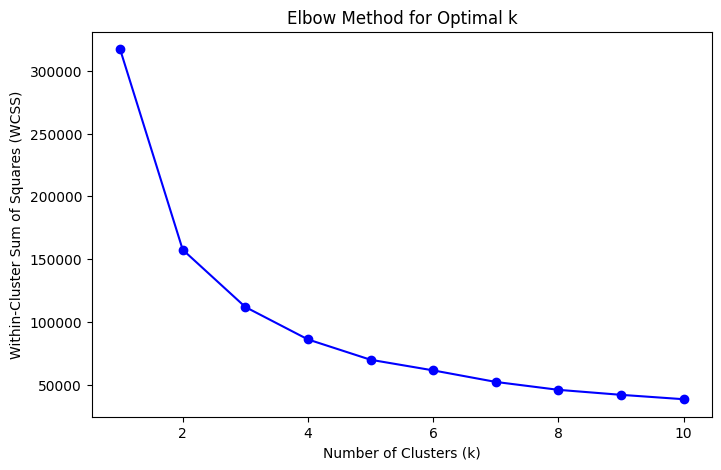

In [106]:
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    kmeans.fit(df_pca)
    
    wcss.append(kmeans.inertia_)

# Elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [107]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init='auto', random_state=42)

kmeans.fit(df_pca)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [108]:
kmeans.labels_

array([0, 0, 1, ..., 1, 1, 1], shape=(71166,), dtype=int32)

In [109]:
cen = kmeans.cluster_centers_
cen

array([[-2.03260861, -0.09602448],
       [ 1.10138533,  0.05203164]])

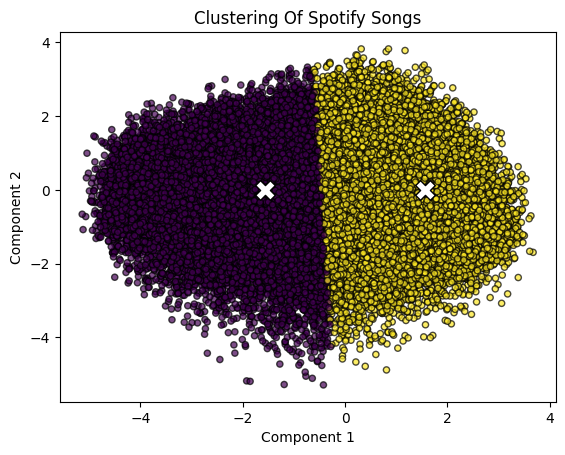

In [110]:
# Plot
cen = pca.fit_transform(kmeans.cluster_centers_)

plt.scatter(df_pca[:,0], df_pca[:,1], c=kmeans.labels_, s=20, alpha=0.7, edgecolors='black')
plt.scatter(cen[:,0], cen[:,1], marker='X', s=200, color='white', edgecolors='black')
plt.title('Clustering Of Spotify Songs')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [111]:
from sklearn.metrics import silhouette_score
test_df = df_pca[:10000]
labels = kmeans.labels_
test_label = labels[:10000]

score = silhouette_score(test_df, test_label)
print(round(score, 4))

0.4305


In [112]:
from sklearn.metrics import silhouette_score
test_df = df_pca[:20000]
labels = kmeans.labels_
test_label = labels[:20000]

score = silhouette_score(test_df, test_label)
print(round(score, 4))

0.4665


Final Score

In [113]:
from sklearn.metrics import silhouette_score
test_df = df_pca
labels = kmeans.labels_
test_label = labels

score = silhouette_score(test_df, test_label)
print(score)

0.45439672918267326


# Model Pipeline

In [114]:
numerical_features = ['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

categorical_features = [
 'key',
 'mode',
 'time_signature']

final_cols = numerical_features + categorical_features

final_df = df[final_cols]
final_df.reset_index(inplace=True)

In [115]:
final_df.drop(columns=['index'], inplace=True)

final_df

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,key,mode,time_signature
0,3.0,0.95200,0.663,170267.0,0.131,0.1030,-13.879,0.0362,99.488,0.368,C,0,5/4
1,15.0,0.93900,0.416,240067.0,0.269,0.1130,-8.949,0.0286,96.827,0.274,F#,1,4/4
2,4.0,0.21500,0.680,213589.0,0.600,0.1110,-7.702,0.0258,110.026,0.433,F#,0,4/4
3,3.0,0.95800,0.758,308627.0,0.264,0.0543,-11.966,0.0496,110.068,0.742,D#,1,3/4
4,1.0,0.38100,0.451,194360.0,0.491,0.1520,-8.730,0.0548,71.633,0.516,D,1,3/4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71161,41.0,0.00166,0.764,242013.0,0.757,0.1020,-7.049,0.0494,115.016,0.669,A#,0,4/4
71162,38.0,0.03810,0.630,230937.0,0.655,0.1680,-6.708,0.0366,102.009,0.329,C,0,4/4
71163,39.0,0.11300,0.611,279510.0,0.493,0.1050,-9.297,0.0354,115.920,0.443,C#,1,4/4
71164,43.0,0.01360,0.294,258267.0,0.739,0.1380,-7.167,0.0434,176.402,0.945,C,1,4/4


For streamlit

In [116]:
# final_df.to_csv("final_df.csv", index=False)

In [117]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('key', OneHotEncoder(handle_unknown='ignore'), ['key']),
        ('time', OneHotEncoder(handle_unknown='ignore'), ['time_signature']),
    ]
)

preprocessor

,transformers,"[('num', ...), ('key', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [118]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),
    ('model', kmeans)
])

model

,steps,"[('preprocessor', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('key', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [119]:
model.fit(final_df)

,steps,"[('preprocessor', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('key', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [120]:
# PCA components
X_pca = model.named_steps['pca'].transform(
    model.named_steps['preprocessor'].transform(df[numerical_features + categorical_features])
)

# Cluster labels
labels = model.named_steps['model'].labels_

# Cluster centroids (in PCA space)
centroids = model.named_steps['model'].cluster_centers_


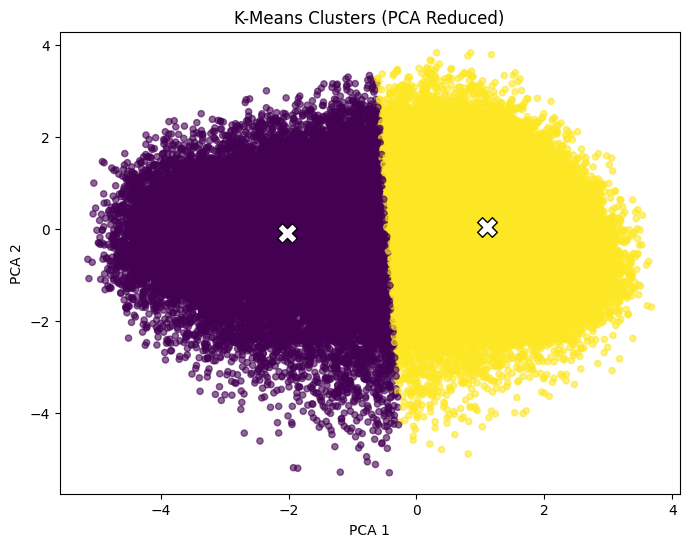

In [121]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, s=20, alpha=0.6)
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, color='white', edgecolors='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clusters (PCA Reduced)')
plt.show()

Silhouette Score

In [122]:
X_preprocessed = model.named_steps['preprocessor'].transform(final_df)

X_pca = model.named_steps['pca'].transform(X_preprocessed)

labels = model.named_steps['model'].labels_

score = silhouette_score(X_pca, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.4543967291826732


It is almost 0.5 that it could be considered the clusters are well-separated.

In [123]:
# Save model
import pickle
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully with pickle!")

Model saved successfully with pickle!


In [124]:
# Load model

with open('kmeans_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

loaded_model

,steps,"[('preprocessor', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('key', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [125]:
# Ask user for input
popularity = float(input("Enter popularity (e.g., 3.0): "))
acousticness = float(input("Enter acousticness (0-1, e.g., 0.952): "))
danceability = float(input("Enter danceability (0-1, e.g., 0.663): "))
duration_ms = float(input("Enter duration in ms (e.g., 170267): "))
energy = float(input("Enter energy (0-1, e.g., 0.131): "))
liveness = float(input("Enter liveness (0-1, e.g., 0.103): "))
loudness = float(input("Enter loudness (dB, e.g., -13.879): "))
speechiness = float(input("Enter speechiness (0-1, e.g., 0.0362): "))
tempo = float(input("Enter tempo (BPM, e.g., 99.488): "))
valence = float(input("Enter valence (0-1, e.g., 0.368): "))
key = input("Enter key (C, C#, D, etc.): ")
mode = input("Enter mode (Major or Minor): ")
time_signature = input("Enter time signature (e.g., 4/4, 3/4): ")


# Create DataFrame
user_data = pd.DataFrame({
    'popularity':[popularity],
    'acousticness':[acousticness],
    'danceability':[danceability],
    'duration_ms':[duration_ms],
    'energy':[energy],
    'liveness':[liveness],
    'loudness':[loudness],
    'speechiness':[speechiness],
    'tempo':[tempo],
    'valence':[valence],
    'key':[key],
    'mode':[mode],
    'time_signature':[time_signature]
})

In [126]:
# Predict cluster 
predicted_values = loaded_model.predict(user_data)
print("Predicted cluster:", predicted_values[0])

Predicted cluster: 0


In [127]:
predicted_values

array([0], dtype=int32)